In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CNN-RNN.h5  Fake.csv  model.png  new_model.png	PPx.csv  PPy.csv  True.csv


In [ ]:
%cd drive/MyDrive/CNN-RNN

/content/drive/MyDrive/CNN-RNN


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Preprocessing DataSet

In [ ]:
df1 = pd.read_csv('Fake.csv')
df = pd.read_csv('True.csv')

In [ ]:
df1['is_real'] = 0
df1.head()

,title,text,subject,date,is_real
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
df['is_real'] = 1
df.head()

,title,text,subject,date,is_real
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df = df.append(df1)
df.index = range(df.shape[0])
df.sample(10)

,title,text,subject,date,is_real
43042,FBI FILES REVEALED: VALERIE JARRETT’S FAMILY T...,I m sure the apple doesn t fall far from the t...,left-news,"Jun 24, 2015",0
3307,U.S. Treasury's Mnuchin to bring up defense on...,WASHINGTON (Reuters) - U.S. Treasury Secretary...,politicsNews,"June 8, 2017",1
37132,WATCH HILARIOUS SNL “Draw Muhammed” Contest Skit…,We d like to offer a special word of thanks ...,politics,"May 11, 2015",0
828,'He's such a dreamer:' Skepticism dogs U.S. en...,WASHINGTON/SEOUL (Reuters) - Saddled with the ...,politicsNews,"November 3, 2017",1
11018,"When Trump tells supporters not to donate, the...",NEW YORK (Reuters) - Donald Trump likes to boa...,politicsNews,"February 1, 2016",1
43330,LISTEN TO THIS FORMER DOJ WHISTLEBLOWER,THE CONGRESS IS THERE TO DO WHAT S BEST FOR TH...,left-news,"Apr 5, 2015",0
6684,Climate scientists adjust as Trump builds team...,SAN FRANCISCO (Reuters) - Climate scientists w...,politicsNews,"December 15, 2016",1
27413,The Reason This Latino Democrat Is Voting For...,The idea of a Donald Trump presidency is scary...,News,"June 6, 2016",0
41705,"OBAMA LECTURES COPS On Bigotry, Slavery, Oppre...",Obama had the audacity to tell this crowd of m...,left-news,"Jul 12, 2016",0
37879,TRUMP TELLS THOUSANDS At FL Rally “Barack Huss...,For anyone who thinks Trump s comments have cr...,Government News,"Aug 10, 2016",0


In [ ]:
df.drop(['date'],axis=1,inplace=True)
df.drop(['title'],axis=1,inplace=True)
df.drop(['subject'],axis=1,inplace=True)
df.head()

,title,is_real
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [ ]:
#dropping incomplete data
df=df.dropna()
#shuffling the rows
df=df.sample(frac=1)
df.index = range(df.shape[0])

In [ ]:
df.head(10)

,title,is_real
0,Democratic senator tussles with U.S. Treasury ...,1
1,FBI Agents Destroy Donald Trump After He Atta...,0
2,Tanzania offers reward for arrest of anti-graf...,1
3,British ministers rally around Foreign Secreta...,1
4,O’REILLY BLASTS FOX NEWS’ Liberal Murdoch Brot...,0
5,"Some officials worry about briefing Trump, fea...",1
6,U.S. House Democratic women seek probe of Trum...,1
7,The Nerve! Clinton Claims The VA Scandal Was N...,0
8,JUST IN: Listen To Trump Tell Howard Stern It...,0
9,U.S. wants NAFTA five-year sunset provision: C...,1


Removing stop words

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
X=df["text"]
y=df["is_real"]
# X=X[0:2500]
# y=y[0:2500]
X.shape

(44898,)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', X[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

Streaming output truncated to the last 5000 lines.
39898
39899
39900
39901
39902
39903
39904
39905
39906
39907
39908
39909
39910
39911
39912
39913
39914
39915
39916
39917
39918
39919
39920
39921
39922
39923
39924
39925
39926
39927
39928
39929
39930
39931
39932
39933
39934
39935
39936
39937
39938
39939
39940
39941
39942
39943
39944
39945
39946
39947
39948
39949
39950
39951
39952
39953
39954
39955
39956
39957
39958
39959
39960
39961
39962
39963
39964
39965
39966
39967
39968
39969
39970
39971
39972
39973
39974
39975
39976
39977
39978
39979
39980
39981
39982
39983
39984
39985
39986
39987
39988
39989
39990
39991
39992
39993
39994
39995
39996
39997
39998
39999
40000
40001
40002
40003
40004
40005
40006
40007
40008
40009
40010
40011
40012
40013
40014
40015
40016
40017
40018
40019
40020
40021
40022
40023
40024
40025
40026
40027
40028
40029
40030
40031
40032
40033
40034
40035
40036
40037
40038
40039
40040
40041
40042
40043
40044
40045
40046
40047
40048
40049
40050
40051
40052
40053
40054
40055
4

In [ ]:
corpus

['democrat senat tussl u treasuri secretari commun',
 'fbi agent destroy donald trump attack agenc jame comey',
 'tanzania offer reward arrest anti graft offici fled',
 'british minist ralli around foreign secretari johnson iran',
 'reilli blast fox news liber murdoch brother disastr viewer rate reveal',
 'offici worri brief trump fear spill secret',
 'u hous democrat women seek probe trump misconduct accus',
 'nerv clinton claim va scandal big deal',
 'listen trump tell howard stern fine call daughter piec ass audio',
 'u want nafta five year sunset provis commerc ross',
 'trump tell democrat kiss special elect internet tell go f ck',
 'hollywood hypocrit leonard dicaprio jet la friend across world mile hear speech global warm',
 'gop plan steal elect american peopl hand romney',
 'sunday screen oper hollywood',
 'wikileak bombshel releas unfit hillari advisor contact nfl commission advic crack head video',
 'put bullet head scuffl break tx legisl gop rep call ice angri illeg alien cr

Tokenizing

In [ ]:
voc_size=5000
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
X_train=onehot_repr

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)
embedded_docs.shape

X=np.array(embedded_docs)
y=np.array(y)
X.shape,y.shape

[[   0    0    0 ... 1869 3228 1068]
 [   0    0    0 ... 4059 2967 3832]
 [   0    0    0 ... 2669 2233 4095]
 ...
 [   0    0    0 ... 1781 4220  833]
 [   0    0    0 ... 1627 2483  352]
 [   0    0    0 ... 2435 2477  930]]


(44898, 20)

MAKING THE MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
embedding_vector_features=40
voc_size=5000
sent_length=300
model = Sequential()
model.add(Embedding(5000,embedding_vector_features,input_length=sent_length))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

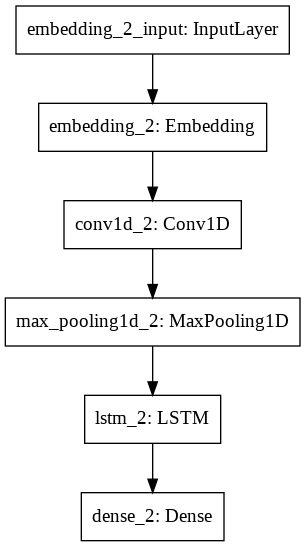

In [ ]:
from keras.utils import plot_model
plot_model(model)

Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
x_train, x_valid, y_train, y_valid = train_test_split(X,y,test_size=0.20, random_state=1000)
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=1000)

In [ ]:
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(8980, 300)
(8980,)
(7184, 300)
(7184,)
(28734, 300)
(28734,)


Training model

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=12,
                    validation_data=(x_valid, y_valid),
                    batch_size=75)

Epoch 1/12
384/384 [==============================] - 73s 185ms/step - loss: 0.2792 - accuracy: 0.8658 - val_loss: 0.0791 - val_accuracy: 0.9765
Epoch 2/12
384/384 [==============================] - 71s 186ms/step - loss: 0.0506 - accuracy: 0.9857 - val_loss: 0.1446 - val_accuracy: 0.9423
Epoch 3/12
384/384 [==============================] - 71s 186ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0587 - val_accuracy: 0.9812
Epoch 4/12
384/384 [==============================] - 72s 187ms/step - loss: 0.0288 - accuracy: 0.9914 - val_loss: 0.0428 - val_accuracy: 0.9874
Epoch 5/12
384/384 [==============================] - 72s 186ms/step - loss: 0.0159 - accuracy: 0.9959 - val_loss: 0.0534 - val_accuracy: 0.9793
Epoch 6/12
384/384 [==============================] - 72s 186ms/step - loss: 0.0168 - accuracy: 0.9955 - val_loss: 0.0459 - val_accuracy: 0.9862
Epoch 7/12
384/384 [==============================] - 72s 186ms/step - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.0354 - val_ac

Testing Model

In [ ]:

#load model with best results
# from tensorflow import keras
# model = keras.models.load_model('CNN-RNN.h5')

In [ ]:
from math import floor
from sklearn.metrics import classification_report, confusion_matrix
def performance(X_test, y_test):
  y_pred=model.predict(X_test)
  # print(y_pred[0])
  y_pred=[1 if x>=0.5 else 0 for x in y_pred]
  # print(y_pred[0])
  cm=confusion_matrix(y_test, y_pred)
  cr=classification_report(y_test, y_pred)

  print("Confusion matrix=\n",cm)
  print("Classification report=\n",cr)

  loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
  print("Testing Accuracy: {:.2f}%".format(accuracy*100))#actual accuracy
  print("Testing Loss: {:.2f}%".format(loss*100)) #testing loss

#call the performance measure function
performance(x_test, y_test)


Confusion matrix=
 [[3650   34]
 [  22 3478]]
Classification report=
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3684
           1       0.99      0.99      0.99      3500

    accuracy                           0.99      7184
   macro avg       0.99      0.99      0.99      7184
weighted avg       0.99      0.99      0.99      7184

Testing Accuracy: 99.22%
Testing Loss: 3.28%


Plotting graphs

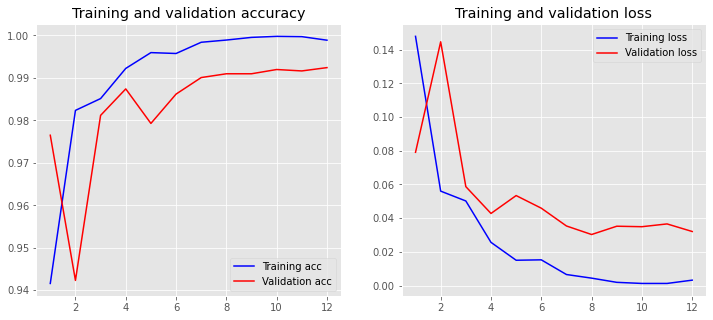

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()



plot_history(history)

Saving model

In [ ]:
#save model
model.save('CNN-RNN1.h5')
